In [1]:
import pandas as pd
df = bigmart_sales_data.copy() = pd.read_csv("https://raw.githubusercontent.com/Sourav9827/Stores-Sales-Prediction/main/bigmart-sales-data/Train.csv")

In [ ]:
df = bigmart_sales_data.copy()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.isnull().sum()["Item_Identifier"]

0

In [7]:
for i in df.columns:
    if df.isnull().sum()[i] > 0:
        print(f"{i} : {df.isnull().sum()[i] * 100 / len(df)} % Data are missing")

Item_Weight : 17.165317376510618 % Data are missing
Outlet_Size : 28.27642848762173 % Data are missing


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Weight'>

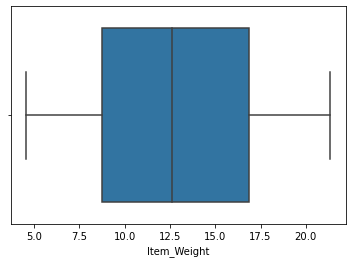

In [11]:
import seaborn as sns
sns.boxplot('Item_Weight', data = df  )

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [13]:
for i in df.columns:
    if df.isnull().sum()[i] > 0:
        print(f"{i} : {df.isnull().sum()[i] * 100 / len(df)} % Data are missing")

Outlet_Size : 28.27642848762173 % Data are missing


In [14]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#Features of Object data type

for i in df.columns:
    if df[i].dtype == "O":
        print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [18]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

"LF" and "low fat" are Same as "Low Fat" and "Reg" is same as "Regular". So we combine these Fat contents into one entity.

In [19]:
# Combine fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [20]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [25]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [26]:
# Deriving new feature from "Outlet_Establishment_Year" by subtracting cuurrent year with the Established Year.

df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)
df.drop(["Outlet_Establishment_Year"], axis=1, inplace=True)

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


<AxesSubplot:xlabel='Item_Weight'>

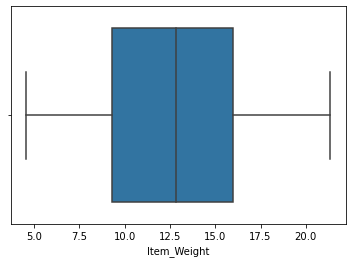

In [28]:
sns.boxplot('Item_Weight', data = df  )

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

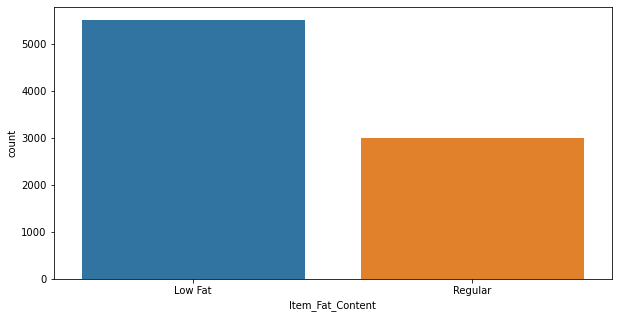

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1] Item_Fat_Content 
plt.figure(figsize = (10,5))
sns.countplot('Item_Fat_Content', data = df)

Observation: Low Fat Items are more sold

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

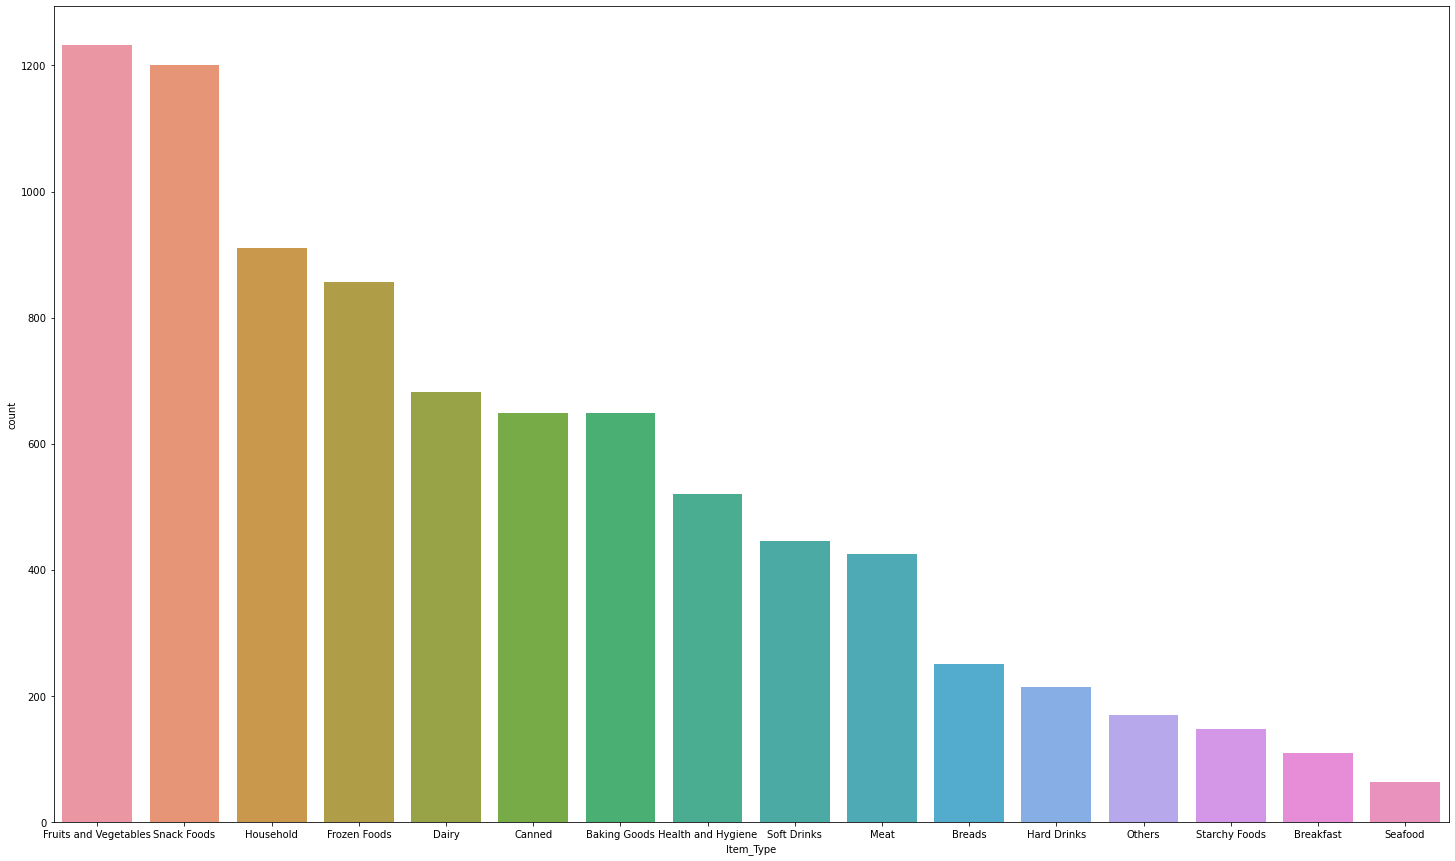

In [30]:
# 2] Item_Fat_Content 

plt.figure(figsize = (25,15))
sns.countplot('Item_Type', data = df,order = df['Item_Type'].value_counts().index)

Observation: Fruits/Vegetables and Snack Foods are the most purchased item while seafood is the least

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

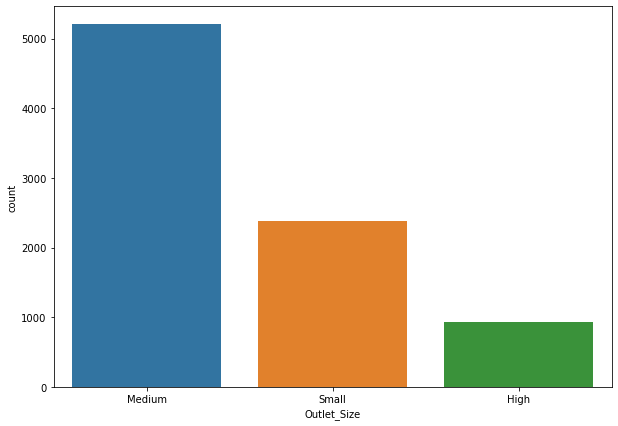

In [31]:
# 3] Outlet_Size 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Size', data = df,order = df['Outlet_Size'].value_counts().index)

Observation: There are more Medium sized Outlets while the High sized outlets are less

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

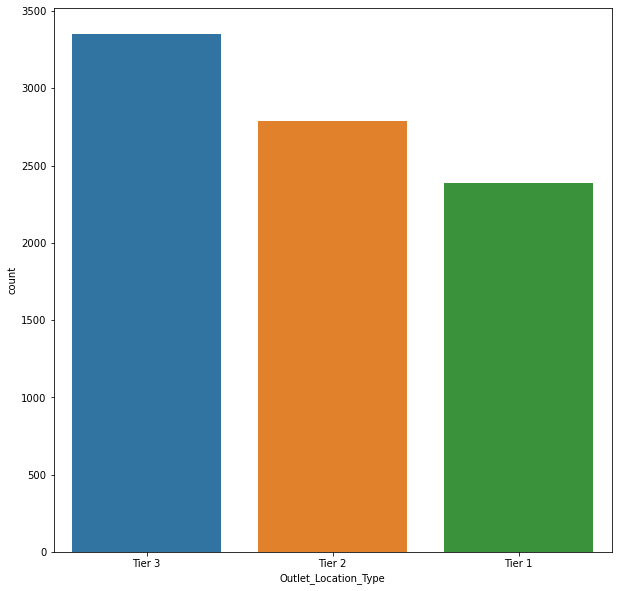

In [32]:
# 3] Outlet_Location_Type 
plt.figure(figsize = (10,10))
sns.countplot('Outlet_Location_Type', data = df, order = df['Outlet_Location_Type'].value_counts().index )

Observation: There are more stores at tier 3 Cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

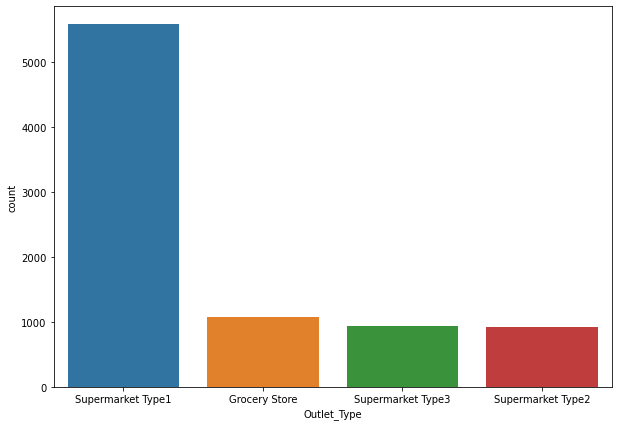

In [33]:
# 3] Outlet_Type 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type', data = df, order = df['Outlet_Type'].value_counts().index )

Observation: There are more number of 'Supermarket Type 1' than any other Outlet types

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

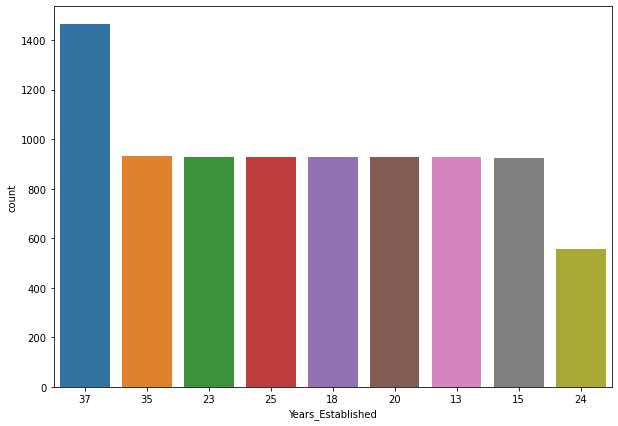

In [34]:
# 4] Years_Established 

plt.figure(figsize = (10,7))
sns.countplot('Years_Established', data = df, order = df['Years_Established'].value_counts().index )

Observation:The Outlets are more of established and running from 37 years.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

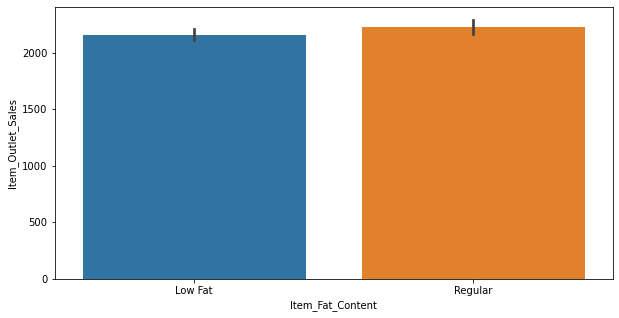

In [35]:
plt.figure(figsize = (10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = df)

Observation:The Item Outles sales are high for both Low Fat and Regular Item types.

In [36]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Established
Item_Weight,1.000000,-0.012049,0.024756,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000,0.049135
Years_Established,0.008301,0.074834,-0.005020,0.049135,1.000000


<AxesSubplot:>

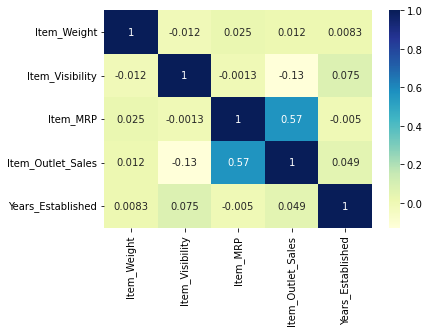

In [37]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Observation: Features are not much correlated

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

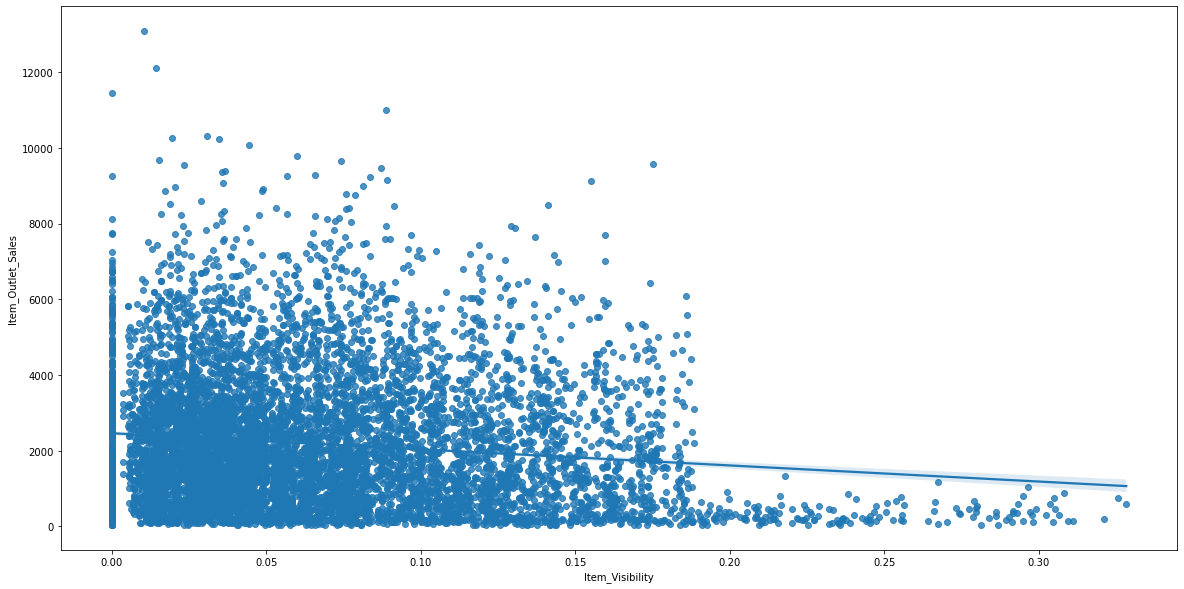

In [38]:
plt.figure(figsize = (20,10))
sns.regplot(x=df["Item_Visibility"], y=df["Item_Outlet_Sales"])

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Text(0, 0.5, 'Item Visibility')

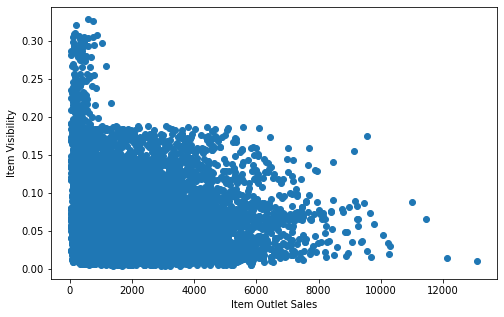

In [39]:
# Imputed mean value where there are 0 visibility
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

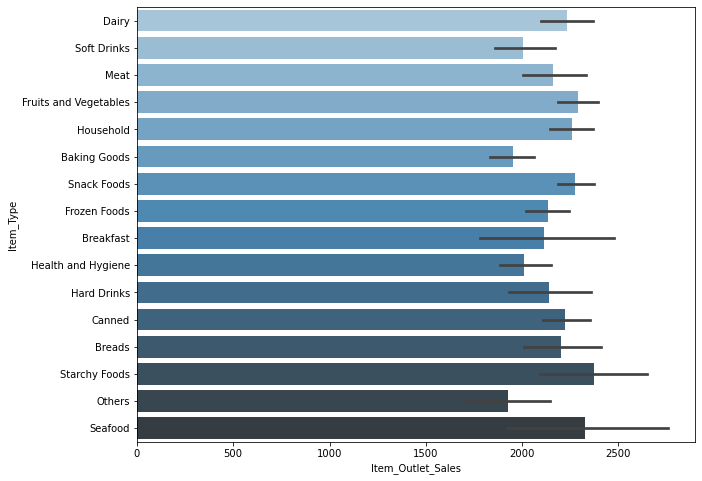

In [40]:
plt.figure(figsize = (10,8))
sns.barplot(x="Item_Outlet_Sales", y="Item_Type", data=df,palette="Blues_d")

Observations: The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

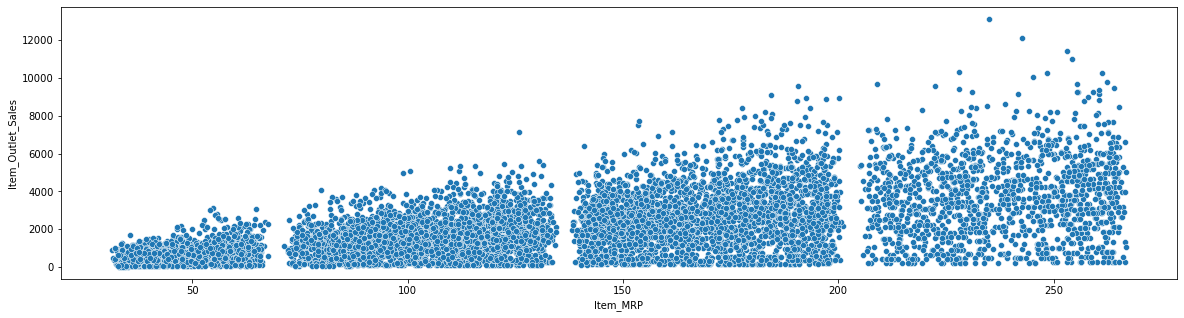

In [41]:
plt.figure(figsize =(20,5))
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df)

Observations: Items MRP ranging from 200-250 dollars is having high Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

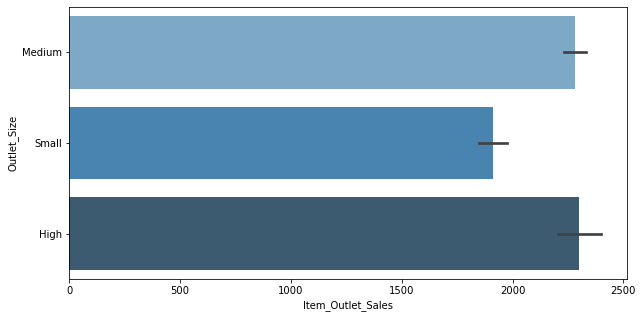

In [42]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Item_Outlet_Sales',y = 'Outlet_Size',data = df, order= df['Outlet_Size'].value_counts().index ,palette="Blues_d")

Observations: The Outlet Sales is maximum for Medium and High sized Outlets. The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

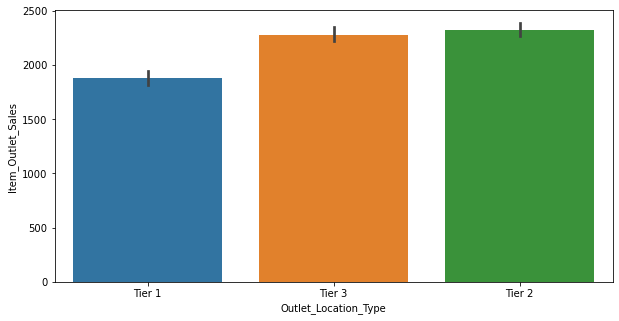

In [43]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = df )

Observations: The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

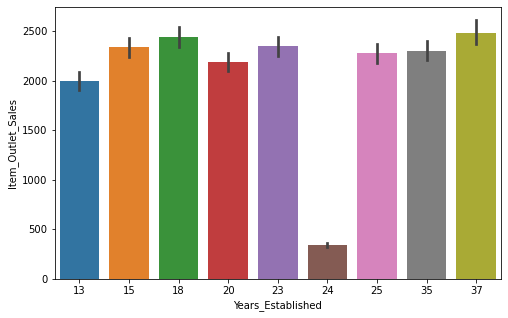

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=df)

Observation:It is quiet evident that Outlets established 35 years before is having good Sales margin. We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

# Handling Categorical Variables

In [45]:
#Features of Object data type

for i in df.columns:
    if df[i].dtype == "O":
        print(i)
        print(df[i].value_counts(), "\n")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: 

In [46]:
df_transformed = df.copy()

In [47]:
# Mean Encoding for Item_Type


Mean_encoded_Item_Type = df_transformed.groupby(["Item_Type"])['Item_Outlet_Sales'].mean().to_dict()
df_transformed["Item_Type"] = df_transformed['Item_Type'].map(Mean_encoded_Item_Type)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [48]:
Mean_encoded_Item_Type

{'Baking Goods': 1952.9712070987655,
 'Breads': 2204.1322262948206,
 'Breakfast': 2111.808650909091,
 'Canned': 2225.19490385208,
 'Dairy': 2232.5425970674487,
 'Frozen Foods': 2132.867743691589,
 'Fruits and Vegetables': 2289.0095915584416,
 'Hard Drinks': 2139.2216224299063,
 'Health and Hygiene': 2010.0002650000001,
 'Household': 2258.78430021978,
 'Meat': 2158.9779105882353,
 'Others': 1926.139701775148,
 'Seafood': 2326.065928125,
 'Snack Foods': 2277.3217391666667,
 'Soft Drinks': 2006.5117348314607,
 'Starchy Foods': 2374.332772972973}

In [49]:
# Mean Encoding for Outlet_Identifier

Mean_encoded_Outlet_Identifier = df_transformed.groupby(["Outlet_Identifier"])['Item_Outlet_Sales'].mean().to_dict()
df_transformed["Outlet_Identifier"] = df_transformed['Outlet_Identifier'].map(Mean_encoded_Outlet_Identifier)
df_transformed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,2232.542597,249.8092,2348.354635,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,2006.511735,48.2692,1995.498739,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,2158.977911,141.6180,2348.354635,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,2289.009592,182.0950,339.351662,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,2258.784300,53.8614,2298.995256,High,Tier 3,Supermarket Type1,994.7052,35


In [50]:
Mean_encoded_Outlet_Identifier

{'OUT010': 339.351661981982,
 'OUT013': 2298.995255579399,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.498739224138,
 'OUT019': 340.3297227272727,
 'OUT027': 3694.0385576470585,
 'OUT035': 2438.841866021505,
 'OUT045': 2192.384797631862,
 'OUT046': 2277.8442668817206,
 'OUT049': 2348.3546346236562}

In [51]:
df_transformed = pd.get_dummies(data=df_transformed, columns=["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"], drop_first=True)

In [52]:
df_transformed.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,2232.542597,249.8092,2348.354635,3735.1380,23,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,2006.511735,48.2692,1995.498739,443.4228,13,1,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,2158.977911,141.6180,2348.354635,2097.2700,23,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.066132,2289.009592,182.0950,339.351662,732.3800,24,1,1,0,0,1,0,0,0
4,NCD19,8.93,0.066132,2258.784300,53.8614,2298.995256,994.7052,35,0,0,0,0,1,1,0,0


In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [54]:
df_transformed.drop("Item_Identifier", axis=1, inplace=True)

In [55]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8523 non-null   float64
 1   Item_Visibility                8523 non-null   float64
 2   Item_Type                      8523 non-null   float64
 3   Item_MRP                       8523 non-null   float64
 4   Outlet_Identifier              8523 non-null   float64
 5   Item_Outlet_Sales              8523 non-null   float64
 6   Years_Established              8523 non-null   int64  
 7   Item_Fat_Content_Regular       8523 non-null   uint8  
 8   Outlet_Size_Medium             8523 non-null   uint8  
 9   Outlet_Size_Small              8523 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8523 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8523 non-null   uint8  
 12  Outlet_Type_Supermarket Type1  8523 non-null   u

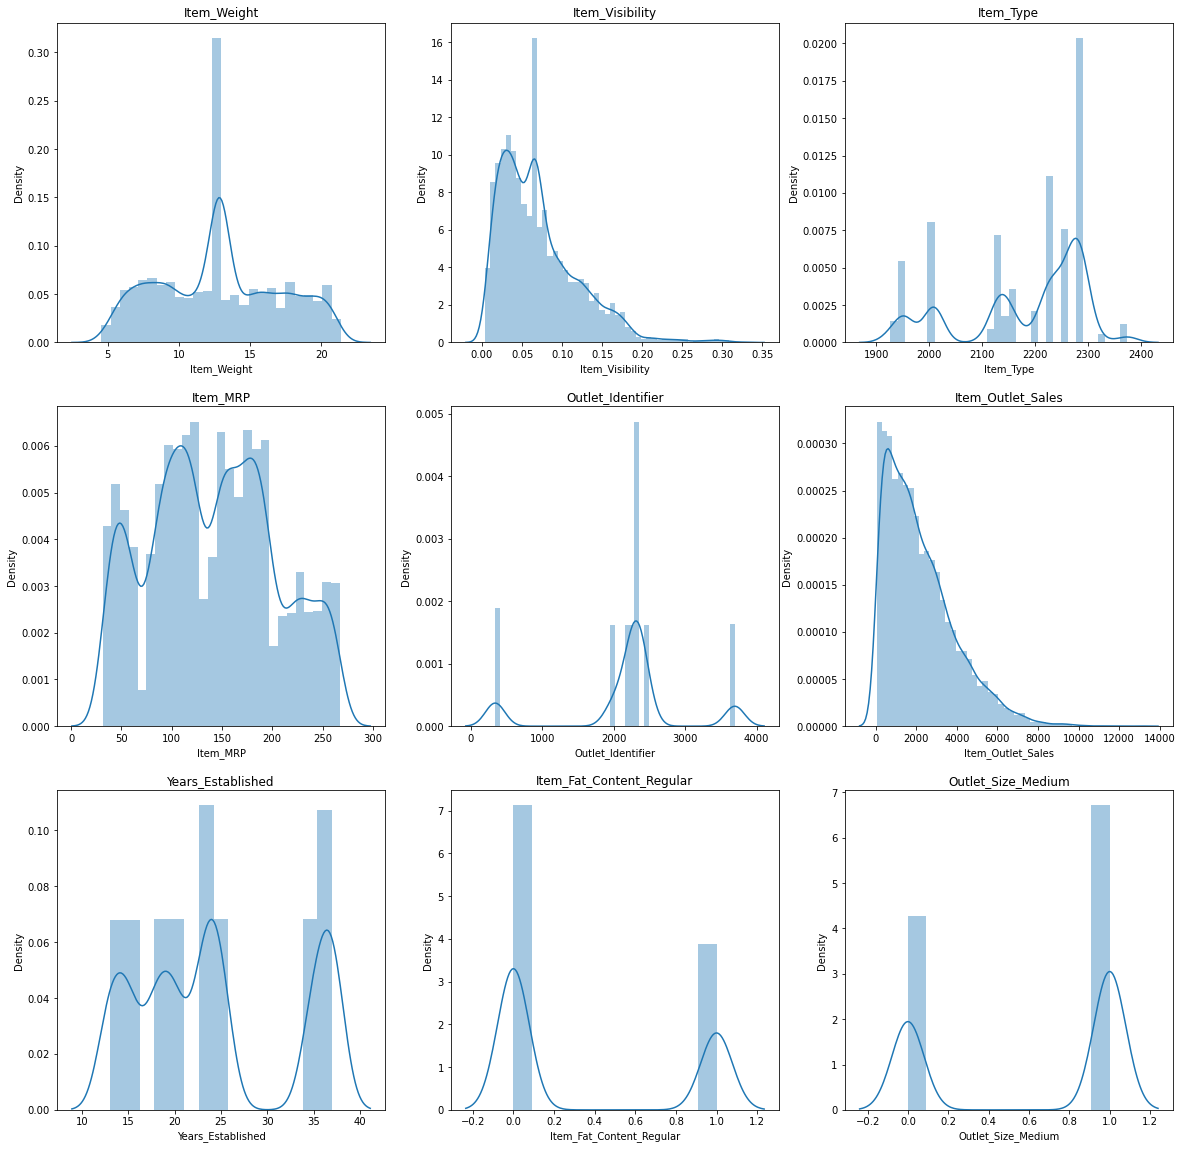

In [56]:
# Distribution of all columns

fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)

for ax, col in zip(axes, df_transformed.columns):
    sns.distplot(df_transformed[col], ax = ax)
    ax.set_title(col)

# Handling Outliers

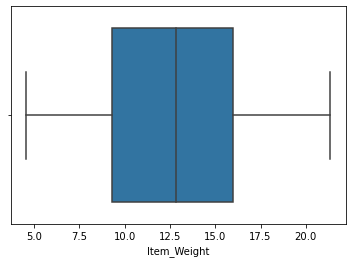

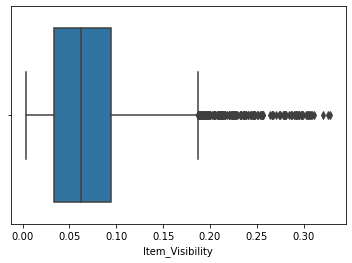

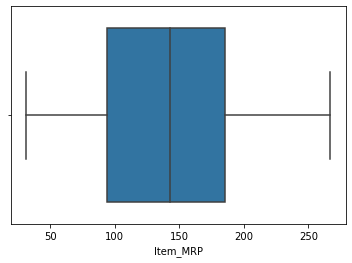

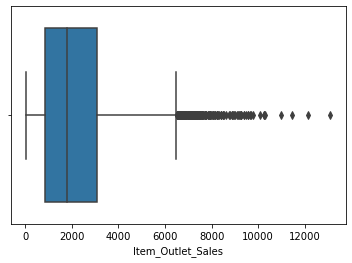

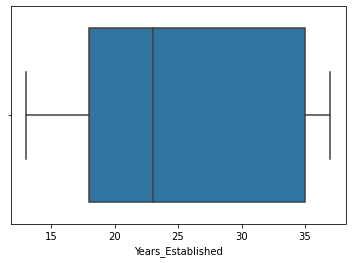

In [57]:
for i in df.columns:
        if df[i].dtype != "O":
                sns.boxplot(df[i])
                plt.show()

In [58]:
import numpy as np
def outliers_calculator(col):  
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper, lower = [], []
    for i in col:
        if i >= (Q3+1.5*IQR):
            upper.append(i)
        if i <= (Q1-1.5*IQR):
            lower.append(i)
    print("Total Element: ", len(col))
    print("Upper bound:",Q3+1.5*IQR)
    print("Lower bound:", Q1-1.5*IQR)
    print("Total Outliers: ", len(upper) + len(lower))
    print(f"Outlier Percent : {(len(upper) + len(lower)) * 100 /len(col)}% ")

    return upper + lower

In [59]:
itemvisout = outliers_calculator(df["Item_Visibility"])

Total Element:  8523
Upper bound: 0.186835216
Lower bound: -0.059164579999999994
Total Outliers:  173
Outlier Percent : 2.0298017130118504% 


In [60]:
for i in range(0, len(df_transformed["Item_Visibility"])):
    if df_transformed["Item_Visibility"][i] in itemvisout:
        df_transformed["Item_Visibility"][i] = np.median(df_transformed["Item_Visibility"])

In [61]:
outletindout = outliers_calculator(df_transformed["Outlet_Identifier"])

Total Element:  8523
Upper bound: 2582.3093901113475
Lower bound: 1958.4300421441708
Total Outliers:  2018
Outlier Percent : 23.677108999178692% 


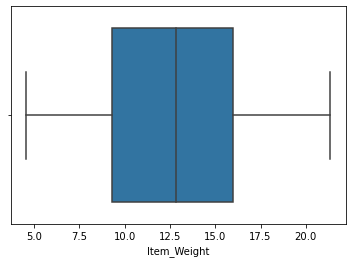

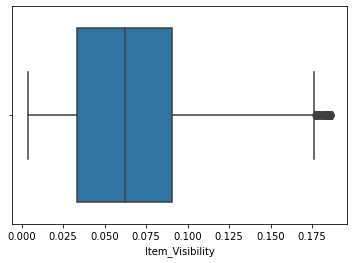

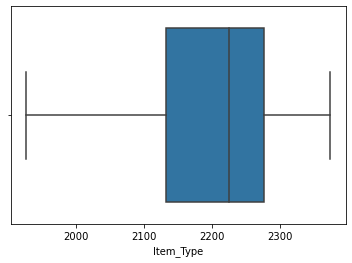

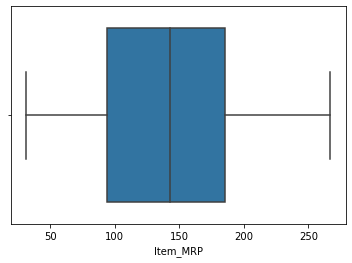

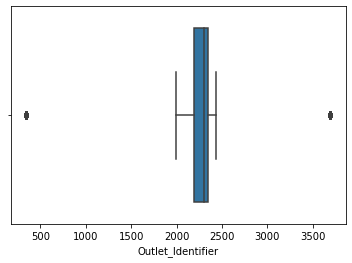

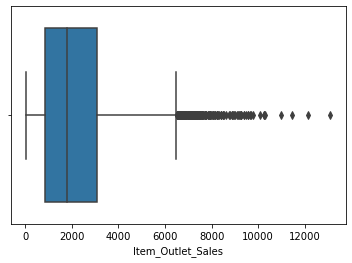

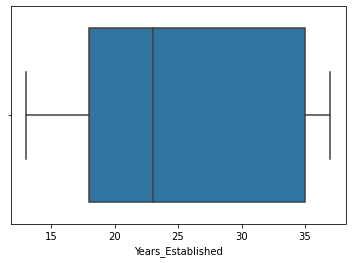

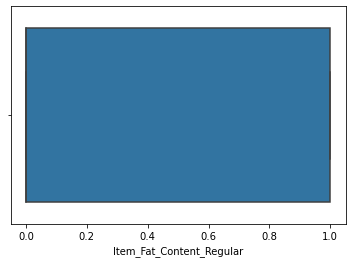

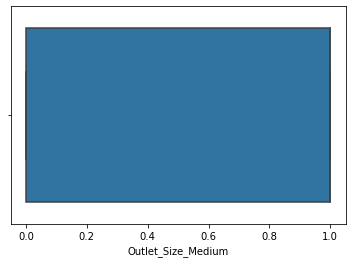

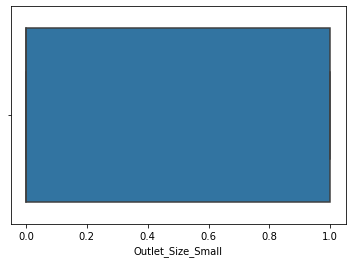

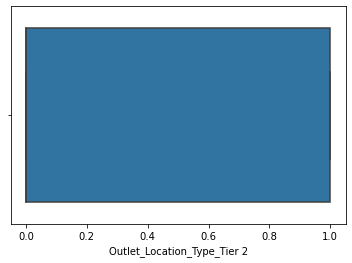

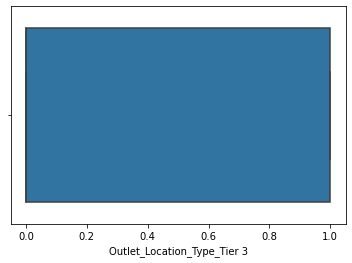

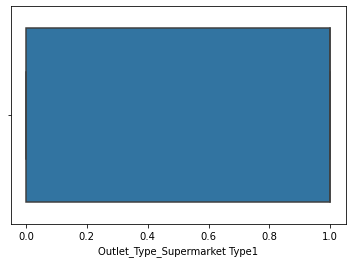

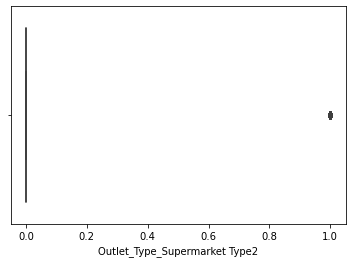

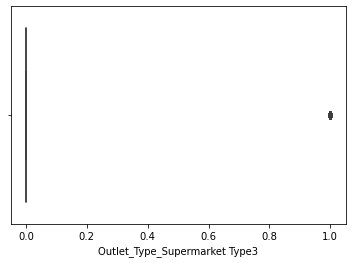

In [62]:
for i in df_transformed.columns:
    sns.boxplot(df_transformed[i])
    plt.show()

# Data Pre-processing

In [63]:
X = df_transformed.drop(['Item_Outlet_Sales'], axis = 1)
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,2232.542597,249.8092,2348.354635,23,0,1,0,0,0,1,0,0
1,5.92,0.019278,2006.511735,48.2692,1995.498739,13,1,1,0,0,1,0,1,0
2,17.50,0.016760,2158.977911,141.6180,2348.354635,23,0,1,0,0,0,1,0,0
3,19.20,0.066132,2289.009592,182.0950,339.351662,24,1,1,0,0,1,0,0,0
4,8.93,0.066132,2258.784300,53.8614,2298.995256,35,0,0,0,0,1,1,0,0


In [64]:
y=df_transformed['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42 )

In [66]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6818, 14) (1705, 14)
(6818,) (1705,)


OLS Regression Analysis

In [67]:
import statsmodels.api as sm
import numpy as np
X1 = sm.add_constant(X)
OLS_model = sm.OLS(y,X1.drop(["Item_Weight",], axis=1)).fit()

In [68]:
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     844.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:20:37   Log-Likelihood:                -71991.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8509   BIC:                         1.441e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1670.8800   1069.943     -1.562      0.118   -3768.229     426.469
Item_Visibility                -287.7041    293.016     -0.982      0.326    -862.087     286.679
Item_Type                         0.0522      0.105      0.497      0.619      -0.154       0.258
Item_MRP                         15.5477      0.197     78.782      0.000      15.161      15.935
Outlet_Identifier                 0.8687      0.358      2.426      0.015       0.167       1.571
Years_Established                -8.6168     16.495     -0.522      0.601     -40.952      23.718
Item_Fat_Content_Regular         50.5097     25.725      1.963      0.050       0.083     100.936
Outlet_Size_Medium             -227.4606    382.674     -0.594      0.552    -977.595     522.674
Outlet_Size_Small              -246.2564    349.873     -0.704      0.482    -932.092     439.580
Outlet_Location_Type_Tier 2     -55.6409    101.159     -0.550      0.582    -253.938     142.656
Outlet_Location_Type_Tier 3    -147.5216    193.215     -0.764      0.445    -526.270     231.227
Outlet_Type_Supermarket Type1   109.9650    574.955      0.191      0.848   -1017.086    1237.016
Outlet_Type_Supermarket Type2   104.1329    468.367      0.222      0.824    -813.980    1022.246
Outlet_Type_Supermarket Type3   562.5036   1377.378      0.408      0.683   -2137.493    3262.500
==============================================================================
Omnibus:                      964.281   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.480
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       5.166   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ML Modeling



## Linear regression

In [69]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
lin_reg_model = linear_regressor.fit(X_train, y_train)

In [70]:
from sklearn.metrics import mean_squared_error
r2_lin = lin_reg_model.score(X_test, y_test)
mse_lin = mean_squared_error(y_test, lin_reg_model.predict(X_test), squared=True)
rmse_lin = np.sqrt(mse_lin)

In [71]:
print(r2_lin)
print(mse_lin)
print(rmse_lin)

0.581323630252019
1137949.8405747672
1066.7473180537024


In [72]:
from sklearn.model_selection import cross_val_score
lin_all_accuracies = cross_val_score(estimator=lin_reg_model, X=X_train, y=y_train, cv=5)
lin_all_accuracies

array([0.55840683, 0.56221945, 0.55513145, 0.5622052 , 0.54440827])

In [73]:
print(lin_all_accuracies.mean())

0.5564742400743632


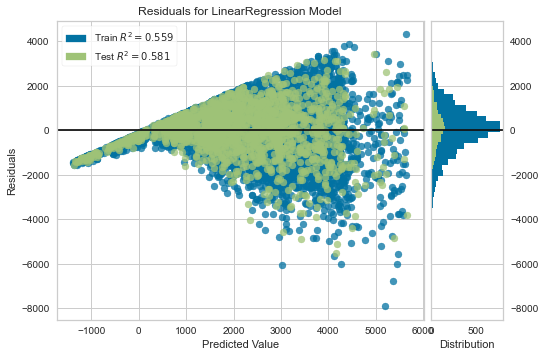

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [74]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linear_regressor)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Ridge

In [75]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)

In [77]:
ridge_model = ridge_reg.fit(X_train, y_train)

In [78]:
print(ridge_model.cv_results_)

{'mean_fit_time': array([0.03989234, 0.01280179, 0.01280227, 0.01650119, 0.99021826,
       0.17000256, 0.00780902, 0.01095963, 0.00960326, 0.01439962,
       0.2525785 , 0.07142453, 0.00959916, 0.00639939, 0.0070251 ,
       0.00472555, 1.04406137, 0.12851639, 0.00937462, 0.00624743,
       0.        , 0.00937157, 0.22987337, 0.04999056, 0.00624943,
       0.00312591, 0.00624871, 0.00279856, 0.98761849, 0.1495688 ,
       0.00624948, 0.00624957, 0.0062501 , 0.00937443, 0.26360431,
       0.06874447, 0.01562419, 0.00937443, 0.01249971, 0.009374  ,
       0.89686275, 0.13123717, 0.00625081, 0.00625019, 0.00937781,
       0.01249914, 0.23575492, 0.068854  , 0.00937881, 0.00624948,
       0.01250129, 0.00625134, 0.92279253, 0.13124056, 0.00937676,
       0.00937238, 0.00312524, 0.00625076, 0.22498317, 0.06562152,
       0.00624785, 0.00678782, 0.01250353, 0.003122  , 0.86861711,
       0.12867522, 0.00624976, 0.00312462, 0.01250329, 0.00312471,
       0.21518474, 0.05624552]), 'std_fit_ti

In [79]:
print(ridge_model.best_estimator_)
print(ridge_model.best_score_)
print(ridge_model.best_params_)
print(ridge_model.best_index_)

Ridge(alpha=1, solver='sparse_cg')
-1307796.8888763008
{'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
3


In [80]:
Ridgeregression = Ridge(**ridge_model.best_params_)
from sklearn.model_selection import cross_val_score
ridge_all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
ridge_all_accuracies

array([0.56135804, 0.5639703 , 0.55601628, 0.56283088, 0.54444427])

In [81]:
print(ridge_all_accuracies.mean())

0.5577239545983386


In [82]:
Ridgeregression_model = Ridgeregression.fit(X_train, y_train)

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_ridge = r2_score(y_test, Ridgeregression_model.predict(X_test))
mse_ridge = mean_squared_error(y_test, Ridgeregression_model.predict(X_test), squared=True)
rmse_ridge = np.sqrt(mse_ridge)

print(r2_ridge)
print(mse_ridge)
print(rmse_ridge)

0.5822869255768951
1135331.6327164425
1065.5194192113265


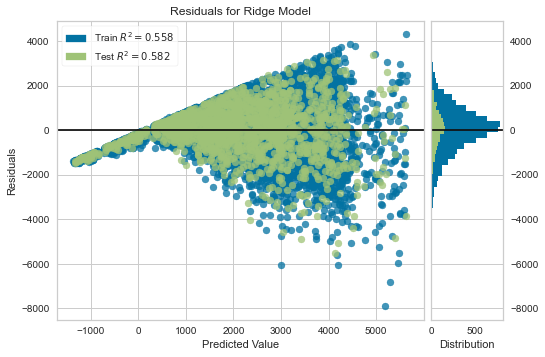

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Ridgeregression_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Lasso 

In [85]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "normalize": [True, False], "random_state": range(1,10)}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)

In [87]:
lasso_model =lasso_reg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(lasso_model.cv_results_)

In [ ]:
print(lasso_model.best_estimator_)
print(lasso_model.best_score_)
print(lasso_model.best_params_)
print(lasso_model.best_index_)

In [ ]:
Lassoregression = Lasso(**lasso_model.best_params_)
from sklearn.model_selection import cross_val_score
lasso_all_accuracies = cross_val_score(estimator=Lassoregression, X=X_train, y=y_train, cv=5)
lasso_all_accuracies

In [ ]:
print(lasso_all_accuracies.mean())

In [ ]:
Lassoregression_model = Lassoregression.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_lasso = r2_score(y_test, Lassoregression_model.predict(X_test))
mse_lasso = mean_squared_error(y_test, Lassoregression_model.predict(X_test), squared=True)
rmse_lasso = np.sqrt(mse_lasso)

print(r2_lasso)
print(mse_lasso)
print(rmse_lasso)

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Lassoregression_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Elasticnet

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "l1_ratio": np.arange(0.0, 1.0, 0.1)}
elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
elasticnet_model = elasticnet_reg.fit(X_train, y_train)

In [ ]:
print(elasticnet_model.cv_results_)

In [ ]:
print(elasticnet_model.best_estimator_)
print(elasticnet_model.best_score_)
print(elasticnet_model.best_params_)
print(elasticnet_model.best_index_)

In [ ]:
ElasticNetregression = ElasticNet(**elasticnet_model.best_params_)
from sklearn.model_selection import cross_val_score
elasticnet_all_accuracies = cross_val_score(estimator=ElasticNetregression, X=X_train, y=y_train, cv=5)
elasticnet_all_accuracies

In [ ]:
print(elasticnet_all_accuracies.mean())

In [ ]:
ElasticNetregression_model = ElasticNetregression.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_elasticnet = r2_score(y_test, ElasticNetregression_model.predict(X_test))
mse_elasticnet = mean_squared_error(y_test, ElasticNetregression_model.predict(X_test), squared=True)
rmse_elasticnet = np.sqrt(mse_elasticnet)

print(r2_elasticnet)
print(mse_elasticnet)
print(rmse_elasticnet)

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(ElasticNetregression_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforestregressor = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[1000],
              "criterion" : ["squared_error", "absolute_error", "poisson"],
              "max_features" : ["auto", "sqrt", "log2"], 
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
              "random_state": [9]}
randomforestregressor_reg = GridSearchCV(randomforestregressor, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
randomforestregressor_model = randomforestregressor_reg.fit(X_train, y_train)

In [ ]:
print(randomforestregressor_model.cv_results_)

In [ ]:
print(randomforestregressor_model.best_estimator_)
print(randomforestregressor_model.best_score_)
print(randomforestregressor_model.best_params_)
print(randomforestregressor_model.best_index_)

In [ ]:
RandomForestRegressor_reg = RandomForestRegressor(**randomforestregressor_model.best_params_)
from sklearn.model_selection import cross_val_score
randomforestregressor_all_accuracies = cross_val_score(estimator=RandomForestRegressor_reg, X=X_train, y=y_train, cv=5)
randomforestregressor_all_accuracies

In [ ]:
print(randomforestregressor_all_accuracies.mean())

In [ ]:
RandomForestRegressor_reg_model = RandomForestRegressor_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_randomforestregressor = r2_score(y_test, RandomForestRegressor_reg_model.predict(X_test))
mse_randomforestregressor = mean_squared_error(y_test, RandomForestRegressor_reg_model.predict(X_test), squared=True)
rmse_randomforestregressor = np.sqrt(mse_randomforestregressor)

print(r2_randomforestregressor)
print(mse_randomforestregressor)
print(rmse_randomforestregressor)

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(RandomForestRegressor_reg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Inferences of Regression Analysis

As we can see the r-squared value of Random forest model is the maximum among all the other regression algorithms, rmse is also the leaset among all the other algorithms, also the residual plot is also quite nice, so we conclude that this Random forest model is the most suitable for the prediction of temprature among all the other regression algorithm.

In [ ]:
import pickle
pickle.dump(RandomForestRegressor_reg_model, open("model_reg.pkl","wb"))

In [ ]:
pickle_model_reg = pickle.load(open("model_reg.pkl", "rb"))
pickle_model_reg.predict(X_test)